In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('ratings.csv')

In [ ]:
df.columns = ['UserId', 'ProductId', 'Rating', 'Timestamp']

In [ ]:
df

,UserId,ProductId,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [ ]:
df.shape

(7824481, 4)

In [ ]:
df.describe()

,Rating,Timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [ ]:
df.isna().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [ ]:
df['Rating']=pd.to_numeric(df['Rating'],errors='coerce').astype(int)

In [ ]:
df.dtypes

UserId       object
ProductId    object
Rating        int32
Timestamp     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   UserId     object
 1   ProductId  object
 2   Rating     int32 
 3   Timestamp  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 208.9+ MB


In [ ]:
df['UserId'].value_counts()

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1WBP7XSZI6AUL      1
A2K7UNJHE9ZR0G      1
A1A6SIW6EWF6FP      1
A1JRDVWYUF8W0P      1
A10M2KEFPEQDHN      1
Name: count, Length: 4201696, dtype: int64

In [ ]:
df['ProductId'].value_counts()

ProductId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B004WL91KI        1
B004WL9FK4        1
B004WL9Q2Q        1
B004WL9R8O        1
BT008V9J9U        1
Name: count, Length: 476001, dtype: int64

In [ ]:
df=df.drop(columns=['Timestamp'])

In [ ]:
df

,UserId,ProductId,Rating
0,A2CX7LUOHB2NDG,0321732944,5
1,A2NWSAGRHCP8N5,0439886341,1
2,A2WNBOD3WNDNKT,0439886341,3
3,A1GI0U4ZRJA8WN,0439886341,1
4,A1QGNMC6O1VW39,0511189877,5
...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5
7824477,A322MDK0M89RHN,BT008UKTMW,5
7824478,A1MH90R0ADMIK0,BT008UKTMW,4
7824479,A10M2KEFPEQDHN,BT008UKTMW,4


<Axes: xlabel='Rating', ylabel='count'>

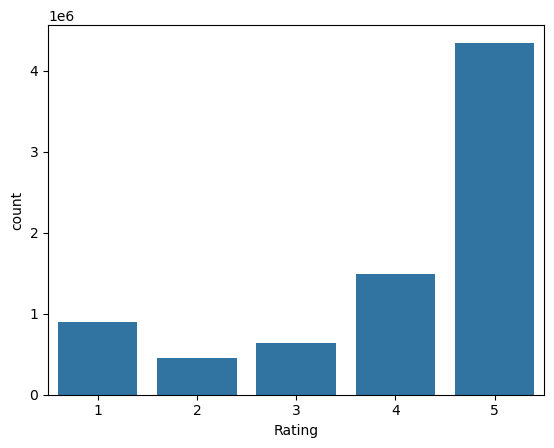

In [ ]:
sns.countplot(x='Rating',data=df)

In [ ]:
# Top 10 products based on ratings
most_rated = df.groupby('ProductId')['Rating'].size().sort_values(ascending=False)[:10]
most_rated

ProductId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: Rating, dtype: int64

In [ ]:
# Top 10 users based on ratings
most_rated_users = df.groupby('UserId')['Rating'].size().sort_values(ascending=False)[:10]
most_rated_users

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: Rating, dtype: int64

In [ ]:
#  users who have rated 50 or more items
Top_Users = df['UserId'].value_counts()
df_final = df[df['UserId'].isin(Top_Users[Top_Users >= 50].index)]

In [ ]:
df_final

,UserId,ProductId,Rating
93,A3BY5KCNQZXV5U,0594451647,5
117,AT09WGFUM934H,0594481813,3
176,A32HSNCNPRUMTR,0970407998,1
177,A17HMM1M7T9PJ1,0970407998,4
491,A3CLWR1UUZT6TG,0972683275,5
...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5


In [ ]:
# The dataframe df_final has users who have rated 50 or more items

In [ ]:
print("The unique Users in final data :- ",df_final['UserId'].nunique())
print("The unique Products in final data :- ",df_final['ProductId'].nunique())

The unique Users in final data :-  1540
The unique Products in final data :-  48190


Text(0.5, 1.0, 'Top 5 Products based on Ratings')

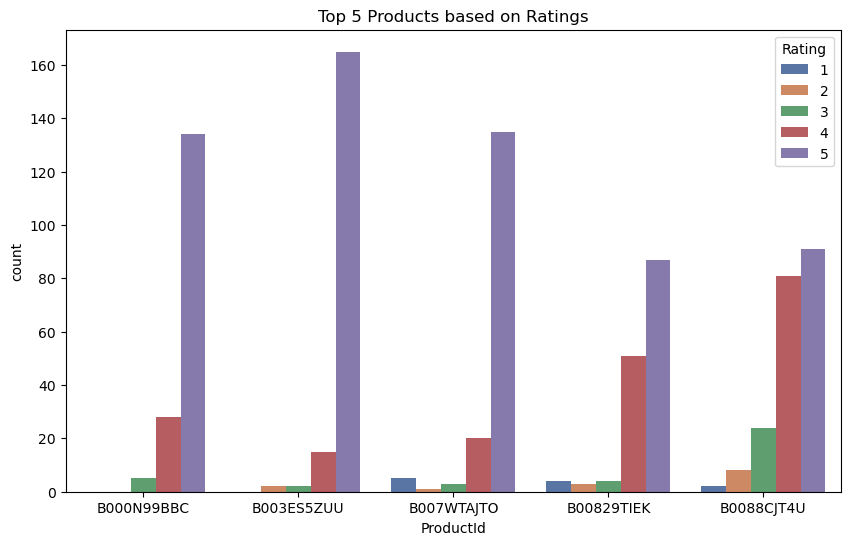

In [ ]:
Top_Products = df_final['ProductId'].value_counts().nlargest(5).index
filetred_df = df_final[df_final['ProductId'].isin(Top_Products)]

plt.figure(figsize=(10,6))
sns.countplot(x='ProductId',hue='Rating',data=filetred_df,palette='deep')
plt.title('Top 5 Products based on Ratings')

In [ ]:
Top_Products = df_final['ProductId'].value_counts().nlargest(5).index
Top_Products

Index(['B0088CJT4U', 'B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B00829TIEK'], dtype='object', name='ProductId')

Text(0.5, 1.0, 'Top 5 Users based on Ratings')

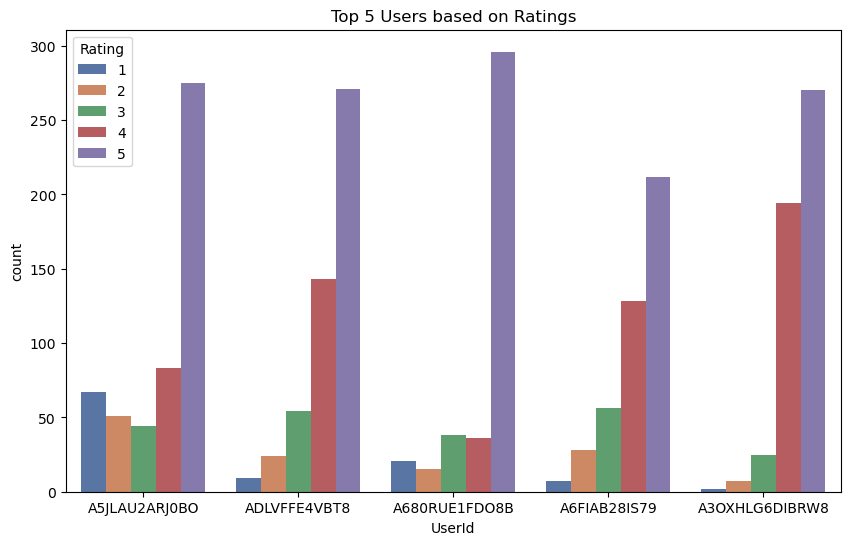

In [ ]:
Top_Users = df_final['UserId'].value_counts().nlargest(5).index
filetred_df = df_final[df_final['UserId'].isin(Top_Users)]

plt.figure(figsize=(10,6))
sns.countplot(x='UserId',hue='Rating',data=filetred_df,palette='deep')
plt.title('Top 5 Users based on Ratings')


In [ ]:
df_final

,UserId,ProductId,Rating
93,A3BY5KCNQZXV5U,0594451647,5
117,AT09WGFUM934H,0594481813,3
176,A32HSNCNPRUMTR,0970407998,1
177,A17HMM1M7T9PJ1,0970407998,4
491,A3CLWR1UUZT6TG,0972683275,5
...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5


<Axes: ylabel='Rating'>

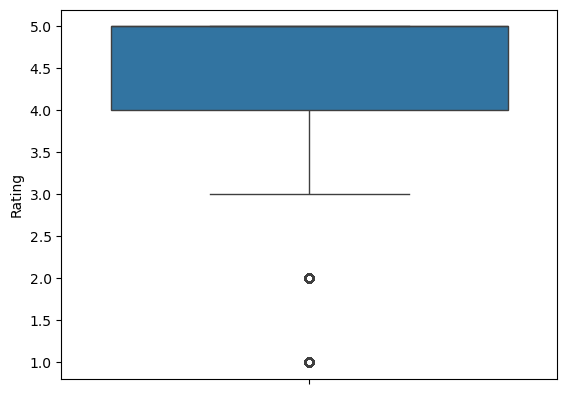

In [ ]:
sns.boxplot(df_final['Rating'])

<Axes: ylabel='Rating'>

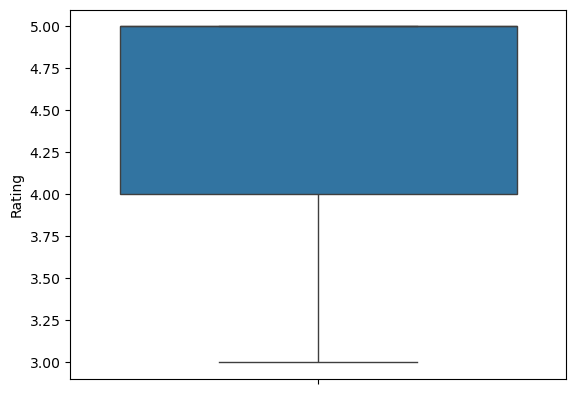

In [ ]:
# Removing outlier of above rating

Q1 = df_final['Rating'].quantile(0.25)
Q3 = df_final['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_final[(df_final['Rating'] >= lower_bound) & (df_final['Rating'] <= upper_bound)]
sns.boxplot(df_no_outliers['Rating'])


In [ ]:
df_final.to_csv("df_final.csv", index=False)

Model Building

In [ ]:
final_ratings_matrix = df_final.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
print('final_ratings_matrix: ', final_ratings_matrix.shape)

final_ratings_matrix:  (1540, 48190)


In [ ]:
final_ratings_matrix

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)


given_num_of_ratings =  125871


In [ ]:
# ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

possible_num_of_ratings =  74212600


In [ ]:
#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

density: 0.17%


ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# User Based collaborative filtering
final_ratings_matrix.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)
final_ratings_matrix.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install -q scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to find similar users and their similarity score
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):

        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appends the user and the similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]

    # Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

In [ ]:
# Gets top 10 similar users to the user index 7 and their similarity score
similar = similar_users(7,final_ratings_matrix)[0][0:10]
similar

[1509, 899, 1533, 1390, 1353, 579, 454, 495, 347, 513]

In [ ]:
similar = similar_users(1521, final_ratings_matrix)[0][0:10]
similar

[991, 1065, 1012, 1402, 1371, 1278, 1518, 692, 785, 161]

In [ ]:
# similarity score
similar_users(1521,final_ratings_matrix)[1][0:10]

[array([[0.10889304]]),
 array([[0.10538068]]),
 array([[0.1026758]]),
 array([[0.09418291]]),
 array([[0.09149062]]),
 array([[0.09135361]]),
 array([[0.09028898]]),
 array([[0.08735684]]),
 array([[0.08673386]]),
 array([[0.08478815]])]

In [ ]:

# recommendation function to get recommendations by using the similar users preferences
def recommendations(user_index, num_of_products, interactions_matrix):

    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finds product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy() # observed_interactions: To avoid duplicate recommendation
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finds 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]


In [ ]:
# recommend 5 products to user id 7 based on similarity
recommendation1=recommendations(7,5,final_ratings_matrix)
recommendation1

['B001UOXPIY', 'B0054L7FVW', 'B000063TJY', 'B004OLP0LK', 'B004G7D0IW']

In [ ]:
recommendation2=recommendations(1521,5,final_ratings_matrix)
recommendation2

['B005LIDMYM', 'B007WVA2PI', 'B008ULPE70', 'B007X3VEUW', 'B005I6EU48']

KMeans

In [ ]:
df_final

,UserId,ProductId,Rating
93,A3BY5KCNQZXV5U,0594451647,5
117,AT09WGFUM934H,0594481813,3
176,A32HSNCNPRUMTR,0970407998,1
177,A17HMM1M7T9PJ1,0970407998,4
491,A3CLWR1UUZT6TG,0972683275,5
...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_final['UserId']=le.fit_transform(df_final['UserId'])
df_final['ProductId']=le.fit_transform(df_final['ProductId'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(df_final)

In [ ]:
# Elbow method to choose number of clusters
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_final)
  inertia.append(kmeans.inertia_)

print(inertia)

[23523776781489.16, 6052755150624.546, 2703584872291.431, 1535736241055.8342, 994432762296.115, 690702815025.8392, 513456499694.6396, 394843607173.0624, 331086554840.47894, 267783401170.63174]


Text(0, 0.5, 'Inertia')

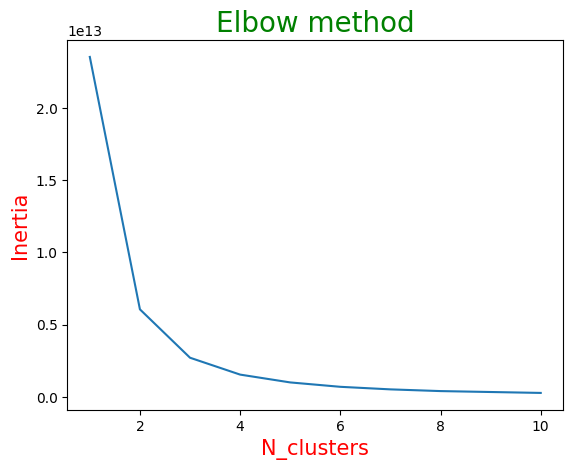

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia)
plt.title('Elbow method',size=20,color='green')
plt.xlabel('N_clusters',size=15,color='red')
plt.ylabel('Inertia',size=15,color='red')

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df_final)

KMeans(n_clusters=2)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df_final,kmeans.labels_)

np.float64(0.6202898714947578)

KMeans with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(df_final)

PCA(n_components=2)

In [ ]:
features=pca.transform(df_final)

In [ ]:
kmeans1=KMeans(n_clusters=2,random_state=42)

In [ ]:
kmeans1.fit(features)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df1=pd.DataFrame(features)
df1=df1.rename(columns={0:'pca1',1:'pca2'})
df1.head()

,pca1,pca2
0,-26197.291601,172.688410
1,-26196.215428,691.688238
2,-26195.305108,80.688078
3,-26195.417827,-687.311884
4,-26194.290427,180.687970


In [ ]:
df1['clusters']=kmeans1.labels_

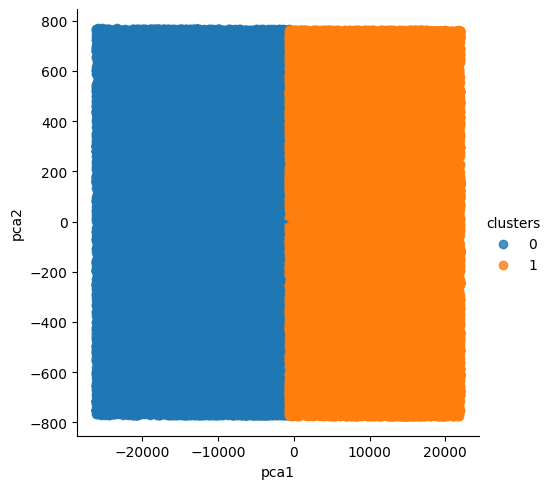

In [ ]:
sns.lmplot(data=df1,x='pca1',y='pca2',hue='clusters')

In [ ]:
silhouette_score(features,kmeans1.labels_)

np.float64(0.6202634416474095)

Model Deployment

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
%%writefile Model_Dep_app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

#load the dataset
df_final=pd.read_csv('/content/df_final.csv')

# Create pivot table
final_ratings_matrix = df_final.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)

# Create user_index mapping and add it as a column
final_ratings_matrix1 = final_ratings_matrix.copy()
final_ratings_matrix1['user_index'] = np.arange(final_ratings_matrix1.shape[0])
user_index_to_id = dict(zip(final_ratings_matrix1['user_index'], final_ratings_matrix1.index))
user_id_to_index = dict(zip(final_ratings_matrix1.index, final_ratings_matrix1['user_index']))

# Set index to user_index for similarity calculations
final_ratings_matrix1.set_index('user_index', inplace=True)

# Function to find similar users and their similarity score
def similar_users(user_index, interactions_matrix):
    user_similarities = cosine_similarity(
        [interactions_matrix.loc[user_index]],
        interactions_matrix
    )[0]

    similarity = [(i, sim) for i, sim in enumerate(user_similarities) if i != user_index]
    similarity.sort(key=lambda x: x[1], reverse=True)

    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]

    # Print actual UserIds if needed
    # print("Most similar UserIds:", [user_index_to_id[i] for i in most_similar_users])

    return most_similar_users, similarity_score

# Recommendation function
def recommendations(user_index, num_of_products, interactions_matrix):
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    user_products = set(interactions_matrix.columns[interactions_matrix.loc[user_index] > 0])

    recommendations = []
    seen = user_products.copy()

    for sim_user in most_similar_users:
        if len(recommendations) >= num_of_products:
            break

        sim_user_products = set(interactions_matrix.columns[interactions_matrix.loc[sim_user] > 0])
        new_recs = list(sim_user_products - seen)
        recommendations.extend(new_recs)
        seen.update(sim_user_products)

    return recommendations[:num_of_products]


# Streamlit interface
st.title("Product Recommendation System")

user_input = st.selectbox("Select a user_id:", final_ratings_matrix.index.tolist())

if st.button("Get Recommendations"):
    similar_users(user_id_to_index[user_input], final_ratings_matrix1)
    recommendation_products = recommendations(user_id_to_index[user_input], 5, final_ratings_matrix1)
    if recommendation_products:
        st.subheader("You might also like:")
        for rec in recommendation_products:
            st.write(f"- {rec}")
    else:
        st.warning("User not found.")

    rp=df_final[df_final['ProductId'].isin(recommendation_products)]
    plt.figure(figsize=(10,6))
    sns.countplot(x='ProductId',hue='Rating',data=rp,palette='deep')
    plt.title('Product ratings')
    st.pyplot(plt)

Writing Model_Dep_app.py


In [ ]:
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 2s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.232.6.250


In [ ]:
!streamlit run Model_Dep_app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.6.250:8501

your url is: https://nice-parrots-rest.loca.lt
  Stopping...
^C
